<a href="https://colab.research.google.com/github/xafsithoo-sys/AI-Healthcare-Diagnosis/blob/main/aibasedpredictiondisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing  libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset directly from GitHub
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
df = pd.read_csv(url, names=columns)

# Display first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Baseline Random Forest Accuracy: 72.08%

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



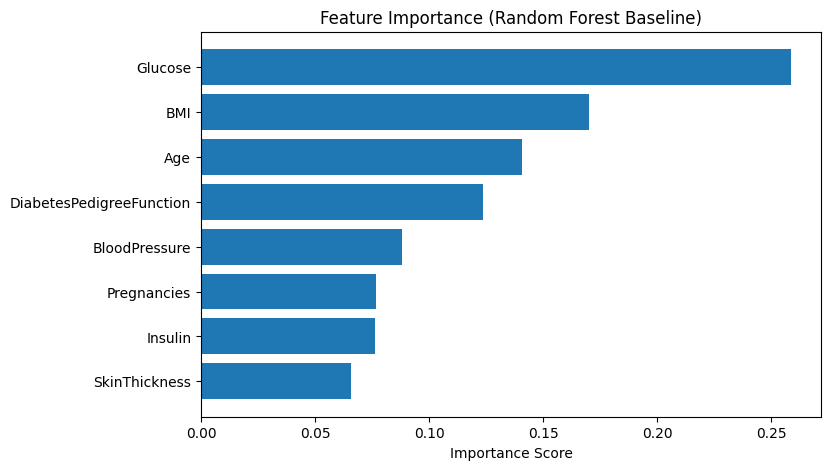

In [5]:
# Prepare features and labels ---
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
#  Split into training and test sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Scale the data ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline model (Random Forest) ---
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

#  Evaluate baseline performance ---
acc = accuracy_score(y_test, y_pred)
print(f"Baseline Random Forest Accuracy: {acc*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize feature importance ---
import numpy as np

feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,5))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.title("Feature Importance (Random Forest Baseline)")
plt.xlabel("Importance Score")
plt.show()

In [4]:
# Save preprocessed data for TensorFlow model
import numpy as np
np.save("X_train_scaled.npy", X_train_scaled)
np.save("X_test_scaled.npy", X_test_scaled)
np.save("y_train.npy", y_train)
np.save("y_test.npy", y_test)

print("Preprocessed data saved successfully.")

Preprocessed data saved successfully.
